Data_Engineering_TIL_(20190514)


#### [학습목표]


- LSTM, attention 등 개념이해


- CNN 구현원리 이해


#### [학습기록]

#### 1. RNN의 한계와 LSTM의 등장 아이디어

시간축으로 데이터가 들어올때마다 state가 변하는 형태가 RNN이었다. 네트워크 쭉 붙어있고 input이 들어와서 output이 나오면 고대로 다음 네트워크의 input으로 들어가는 형태였다. RNN은 입력에 따라서 state가 수시로 바뀌기 때문에 최근 몇개 정도 단어만 기억할 수 있는 그런정도의 기억력 밖에 없는 것이다. 그런데 RNN을 이용해서 소설을 쓰겠다, 글을 쓰겠다라는 것은 RNN이 기억력이 얼마 안되기 때문에 현실적으로 어려운 부분이 있다. RNN으로 주가를 예측하는 경우에도 단기 기간만 예측이 가능할 것이다.


그래서 나온 개념이 LSTM이다. 긴 기억력을 갖기 위한 구조로 되어있다. 기억력을 담당하는 state라는 것이 있고, 매트릭스 형태의 weight로 이루어져 있다. 그게 input이 들어와도 아주 조금만 수정이 된다. RNN은 input이 들어오면 state가 확확 바뀌었는데 LSTM의 cell state라는 것은 조금씩만 수정이 된다. 그리고 forget gate랑 input gate라는 것이 있어서 cell state에 불필요하다고 판단되는 정보를 제거한다던가 아니면 새로운 정보를 state에 기억하는 역할을 한다. 시그모이드나 탄젠트 함수를 활성화 함수로 활용한다. 그리고 이 두가지의 조합으로 state가 업데이트되고 이걸 출력을 하게 되는 구조다.


여기서 더 나간 개념이 GRU이다. LSTM이랑 거의 같은 성능을 내는데 LSTM보다 더 간단한 구조로 구현한 것이다. gate들을 어떻게 배치할 것인가에서 더 발전된 형태이다.


#### 2. Attention


사람이 예를들어서 공부할때 모든 상황에 집중할 수 없는 것처럼 좁은 영역의 포커스에서 뭔가 판단하고 결정하는 것에 집중하는 개념이다. RNN의 문제가 주변의 몇단어 밖에 기억을 못하는 것이었는데 LSTM은 수백단어 이상 기억할 수 있다. 그런데 attention이라는 것은 state를 다 저장을 하고 있는 것이다. 

예를 들어보자. 'he loved to eat'이라는 문장이 들어오면 he 가 먼저 네트워크 하나에 들어와 state를 바뀌고, loved가 들어오면 또 내부 state가 바뀌고 to가 들어오면 state가 바뀌고 이런식이다. 그래서 이걸 generation하는데 활용한다고 하면 he가 들어오면 내부스테이트가 바뀌어서 loved가 출력되고 loved가 입력되면 또 내부스테이트가 바뀌면서 to가 출력되는 이런 네트워크다. 

attention은 내부에 state를 백업을 시키는 개념이라고 보면된다. 비유를 들자면 고3학생이 시험기간에 공부를 하는데 수학을 공부한 다음에 수학을 공부한 뇌를 백업시키고, 그 다음에 과학을 공부하면 수학을 공부했던게 머리속에서 지워지기 때문에.. 그래서 또 과학을 공부하면 과학을 공부한 뇌를 백업시킨다. 그런 다음에 시험볼때 백업되어 있던 뇌를 가져와서 시험을 치르는 방식이다. 

state라는게 기억력이나 그때의 문맥, 상황을 의미하는데 그거를 특정개수만큼을 백업을 해놓는 것이다. 백업한 state를 필요한 상황에 맞게 꺼내서 활용을 하는 방식이다. 그러면 최종상태에서 찾는 것보다 훨씬더 좋은 성능을 가진 모델을 만들 수 있다는 아이디어다.


#### 3. Dynamic memory networks

attention 을 강조한 개념이다. NLP분야에서 많이 하는 연구가 글을 읽고 그 물음에 대해서 답하는 것인데 거기에 attention을 활용한다.

RNN을 여러개를 조합한 것이다. 예를들어서 그림 하단에 지문들이 있고 question으로 football이 어디에 있느냐 라고 하면 이거에 답을 하려면 지문들을 읽고 논리적인 인과관계를 잘 봐야 한다. 인과관계를 따져보면 결국에는 john이 hallway에 football을 내려놨다. 이런 결과를 dynamic memory networks는 낼 수 있다.

RNN여이 있고 attention이 두층짜리 attention 모듈이 조합된 형태이다. 하나의 rnn이 있고, 거기에서 학습하는 내용은 단어단위로 문장을 rnn에 학습을 한다. 그 다음에 memory 모듈이라고 되어 있는게 state들을 다 저장을 해놓은 것이다. 나의 뇌를 백업해놓는 것처럼..

헷갈리면 안되는게 아래 그림이 시간축처럼 되어 있다고 뭔가 연결된게 아니고 그냥 펼쳐서 그린거고 하나의 RNN이 있는 것이다.

question module도 rnn인데 질문이 들어왔을때 질문에서 question이랑 메모리 모듈, 인풋모듈 다 연결되어 있어서 질문이 들어오면 메모리의 어떤 attention의 백업본에 어떤 레이블 부분을 참조를 해야하는지 조치를 해준다. 답변이 레이블로 있기때문에 이거를 학습을 시킬 수 있다. 아래와 같은 예문을 엄청나게 많이 준비해서 한번에 학습을 시키면 이렇게 학습된 모듈은 지문을 읽고 질문을 했을때 그거에 맞게 답변을 할 수 있게 된다.

이런식의 접근방식이 end-to-end 학습이라고 한다.

지문을 읽고 파악하는 능력, 질문이 무엇인지 해석하는 능력, 지문속에서 질문에 대한 답을 찾아내는 능력, 답을 골라내는 능력 이런거를 따로 학습하는 것이 아니고 이런식으로 통째로 모델을 만든다음에 지문넣고 질문넣고 답변넣고 그냥 이 질문을 보고 이 질문에 대한 답은 이거야라고 통째로 학습을 시키는 방법이다.

<img src="1.png" width="1000" />

심지어 아래그림과 같이  input module에 지문이 아니라 사진으로 갈아끼기도 할 수 있다.

<img src="2.png" width="1000" />

그래서 다음과 같이 답을 할 수 있는 일반적인 지식을 갖는 네트워크로 만들 수 있다. 

이런게 attention이랑 memory를 통해서 질문에 답을 할 수 있는 능력을 확장한 네트워크이다.

<img src="3.png" width="1000" />

#### 4. 구글번역기

구글번역기도 RNN으로 학습을 해서 비약적인 성능향상을 보여주고 있다. 한글 -> 일본어로 번역을 한다면 RNN의 state라는 형태로 언어가 표현되는 것이기 때문에 그거는 일본어도 아니고 한국어도 아니고 영어도 아니고 기계가 이해하는 새로운 형식으로 바뀌어서 학습을 하게 된다.

#### 5. 간단한 뉴럴네트워크로 이미지 처리하는 실습

얼굴사진에서 눈,코,입,눈썹의 위치를 찾아내는 간단한 뉴럴네트워크로 구현

사진하나당 15개의 얼굴 포인트를 가지고 있는 데이터가 있고 이거를 사진을 학습을 해서 새로운 사진이 들어왔을때 눈,코,입,눈썹을 찾아낸다.

이거를 잘 활용한게 snow라는 어플이다.

셀카찍으면 눈을 키워주거나 안경을 씌워주는 이런식으로 활용할 수 있다.

In [13]:
import tensorflow as tf 
from pandas.io.parsers import read_csv
import os
import numpy as np

image_file_training = 'training.csv'

image_df = read_csv(os.path.expanduser(image_file_training))  
# load pandas dataframe

image_df.head(3)
# 15개의 얼굴 포인트인데 x,y 좌표가 있어서 30개의 얼굴포인트가 있다고 보면 된다.
# 그리고 맨 오른쪽에 'Image'컬럼이라고 해서 이미지 데이터가 있다.
# 이게 숫자 string으로 되어 있는데 이미지 픽셀 데이터로 되어 있는 형태이기 때문이다.

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...


In [14]:
# 예를들어서 첫번째 observation을 따서 숫자 string으로 되어 있는 것을
# 넘파이의 formstring 함수를 이용해서 np.array 형태로 바꿔보면 아래와 같다.
# 96*96(=9216) 이미지이기 때문에 (9216,)이 나오는 것이고
# image_array를 까보면 array 형태로 픽셀 데이터로 이루어져 있는 것을 알 수 있다.
image_array = np.fromstring(image_df["Image"][0], sep=' ')
print(image_array.shape)
image_array

(9216,)


array([238., 236., 237., ...,  70.,  75.,  90.])

In [15]:
image_df['Image_arr'] = image_df['Image'].apply(lambda im: np.fromstring(im, sep=' '))
# Image_arr 칼럼을 새로만드는데 image 칼럼의 데이터를 람다를 이용해서 위에처럼 전부 array형태로 변환해준다.

In [16]:
image_df.count()

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [17]:
image_df_clean = image_df.dropna()
# null 값이 있는 데이터는 제거해준다.

In [18]:
image_df_clean.count()
# 그러면 2140장의 사진 데이터만 남는다

left_eye_center_x            2140
left_eye_center_y            2140
right_eye_center_x           2140
right_eye_center_y           2140
left_eye_inner_corner_x      2140
left_eye_inner_corner_y      2140
left_eye_outer_corner_x      2140
left_eye_outer_corner_y      2140
right_eye_inner_corner_x     2140
right_eye_inner_corner_y     2140
right_eye_outer_corner_x     2140
right_eye_outer_corner_y     2140
left_eyebrow_inner_end_x     2140
left_eyebrow_inner_end_y     2140
left_eyebrow_outer_end_x     2140
left_eyebrow_outer_end_y     2140
right_eyebrow_inner_end_x    2140
right_eyebrow_inner_end_y    2140
right_eyebrow_outer_end_x    2140
right_eyebrow_outer_end_y    2140
nose_tip_x                   2140
nose_tip_y                   2140
mouth_left_corner_x          2140
mouth_left_corner_y          2140
mouth_right_corner_x         2140
mouth_right_corner_y         2140
mouth_center_top_lip_x       2140
mouth_center_top_lip_y       2140
mouth_center_bottom_lip_x    2140
mouth_center_b

In [20]:
# 현재 image_df_clean['Image_arr'].values 는 아래와 같은데
image_df_clean['Image_arr'].values

array([array([238., 236., 237., ...,  70.,  75.,  90.]),
       array([219., 215., 204., ...,   1.,   1.,   1.]),
       array([144., 142., 159., ...,  78.,  78.,  77.]), ...,
       array([31., 40., 47., ..., 39., 51., 75.]),
       array([  7.,   1.,   5., ..., 179., 177.,  57.]),
       array([ 68.,  19.,  19., ..., 125., 124., 119.])], dtype=object)

In [19]:
image_df_clean['Image_arr'].values.shape

(2140,)

In [21]:
# vstack을 해주면 아래와 같이 변환이 된다. 
# 우리는 이렇게 vstack을 한 형태를 X 데이터로 쓸 것이다.
np.vstack(image_df_clean['Image_arr'].values)

array([[238., 236., 237., ...,  70.,  75.,  90.],
       [219., 215., 204., ...,   1.,   1.,   1.],
       [144., 142., 159., ...,  78.,  78.,  77.],
       ...,
       [ 31.,  40.,  47., ...,  39.,  51.,  75.],
       [  7.,   1.,   5., ..., 179., 177.,  57.],
       [ 68.,  19.,  19., ..., 125., 124., 119.]])

In [22]:
np.vstack(image_df_clean['Image_arr'].values).shape

(2140, 9216)

- 참고로 vstack은 열의 수가 같은 두 개 이상의 배열을 위아래로 연결하여 행의 수가 더 많은 배열을 만든다. 하나의 리스트에 담아야 한다.

In [23]:
X = np.vstack(image_df_clean['Image_arr'].values) / 255.
# pixel values가 0부터 255까지 되어 있는데 이거를 전부 255로 나누어서 
# pixel values를 0과 1 사이의 값으로 변환한다
# 딥러닝 모델에서 보통 0과 1사이의 값으로 처리를 하기 때문에 이렇게 처리한 것이다.

X = X.astype(np.float32)
print(X.shape)
X

(2140, 9216)


array([[0.93333334, 0.9254902 , 0.92941177, ..., 0.27450982, 0.29411766,
        0.3529412 ],
       [0.85882354, 0.84313726, 0.8       , ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.5647059 , 0.5568628 , 0.62352943, ..., 0.30588236, 0.30588236,
        0.3019608 ],
       ...,
       [0.12156863, 0.15686275, 0.18431373, ..., 0.15294118, 0.2       ,
        0.29411766],
       [0.02745098, 0.00392157, 0.01960784, ..., 0.7019608 , 0.69411767,
        0.22352941],
       [0.26666668, 0.07450981, 0.07450981, ..., 0.49019608, 0.4862745 ,
        0.46666667]], dtype=float32)

In [24]:
y = image_df_clean[image_df_clean.columns[:-2]].values
# 그리고 정답 라벨링할 y데이터는 이미지 픽셀이 담긴 'Image_arr', 'Image' 피쳐 두개를 제거해준다.
# 다시말해서 눈코입이 어디있는지 포인트 찍은 데이터만 남기는 작업을 한 것이다.
y

array([[66.03356391, 39.00227368, 30.22700752, ..., 72.93545865,
        43.13070677, 84.48577444],
       [64.33293617, 34.9700766 , 29.9492766 , ..., 70.26655319,
        45.46791489, 85.48017021],
       [65.05705263, 34.90964211, 30.90378947, ..., 70.19178947,
        47.27494737, 78.65936842],
       ...,
       [68.43086625, 38.65197512, 28.89585706, ..., 79.04312978,
        47.17673868, 89.54452244],
       [64.15217959, 30.69159184, 27.00089796, ..., 79.30142857,
        58.61108571, 80.35554286],
       [66.6837551 , 34.48342857, 30.7844898 , ..., 75.96359236,
        52.92337132, 82.66106175]])

In [31]:
y = (y - 48) / 48
# -1 ~ 1의 값으로 노멀라이징
y = y.astype(np.float32)
y

array([[ 0.37569925, -0.18745263, -0.37027067, ...,  0.5194887 ,
        -0.10144361,  0.7601203 ],
       [ 0.3402695 , -0.27145675, -0.37605673, ...,  0.46388653,
        -0.05275177,  0.7808369 ],
       [ 0.35535526, -0.27271578, -0.35617104, ...,  0.46232894,
        -0.01510526,  0.63873684],
       ...,
       [ 0.42564306, -0.19475052, -0.39800298, ...,  0.64673185,
        -0.01715128,  0.8655109 ],
       [ 0.33650374, -0.36059183, -0.43748128, ...,  0.6521131 ,
         0.22106428,  0.6740738 ],
       [ 0.38924488, -0.28159523, -0.35865647, ...,  0.58257484,
         0.10257024,  0.72210544]], dtype=float32)

In [32]:
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=42)  
# shuffle train data

In [33]:
# 데이터를 그려주는 함수구현
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    points = y.reshape(30,)
    axis.imshow(img, cmap="gray")
    axis.scatter(points[0::2] * 48 + 48, points[1::2] * 48 + 48, marker='x', s=50, c='r')

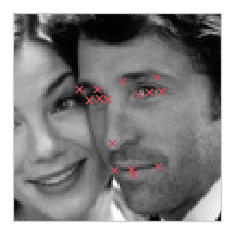

In [36]:
%matplotlib inline
import matplotlib.pyplot as pyplot

fig = pyplot.figure(figsize=(12, 12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

ax = fig.add_subplot(4, 4, 1, xticks=[], yticks=[])
plot_sample(X[3], y[3], ax)

pyplot.show()

- 위에 구현한 코드내용을 facial_recognition_util.py 에 구현해 놓는다.

In [37]:
# 그래서 facial_recognition_util.py에 구현한 기능들을 가져와서 쓸 것이다.
from facial_recognition_util import *

In [38]:
## train, test 데이터 분리

X, y = load()

num_validation = int(X.shape[0] * 0.7)

X_train, y_train = X[:num_validation, :], y[:num_validation, :]
X_validation, y_validation = X[num_validation:, :], y[num_validation:, :]

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [39]:
X_train

array([[0.79607844, 0.7058824 , 0.59607846, ..., 0.11372549, 0.14901961,
        0.17254902],
       [0.12941177, 0.21960784, 0.34509805, ..., 0.21176471, 0.22352941,
        0.23137255],
       [0.34509805, 0.12156863, 0.10196079, ..., 0.10980392, 0.11764706,
        0.12156863],
       ...,
       [0.44705883, 0.42352942, 0.36078432, ..., 0.50980395, 0.53333336,
        0.5372549 ],
       [0.04313726, 0.02352941, 0.02745098, ..., 0.02352941, 0.04705882,
        0.06666667],
       [0.0627451 , 0.0627451 , 0.0627451 , ..., 0.40784314, 0.39607844,
        0.35686275]], dtype=float32)

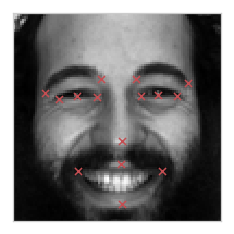

In [40]:
%matplotlib inline
import matplotlib.pyplot as pyplot

fig = pyplot.figure(figsize=(12, 12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

ax = fig.add_subplot(4, 4, 1, xticks=[], yticks=[])
plot_sample(X[0], y[0], ax)

pyplot.show()

In [41]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(9216,)),
  ## 이미지 픽셀을 1열로 줄을 쭉 세우면 싸이즈가 (1,9216)이 되기 때문에 인풋포인트도 9216(96*96)이 되야한다.
    
  tf.keras.layers.Dense(1000, activation=tf.nn.relu),
  tf.keras.layers.Dense(1000, activation=tf.nn.relu),
  tf.keras.layers.Dense(1000, activation=tf.nn.relu),
  tf.keras.layers.Dense(30)
  ## 1000개 짜리 레이어 3개로 뉴럴네트워크를 만들어보자
  ## 마지막 레이어에는 30개의 포인트를 찍어내야하기 때문에 dense를 30을 쓴다.
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

In [ ]:
model.fit(X_train, y_train, epochs=100)
## 100번을 돌리며 학습한다.

model.evaluate(X_validation, y_validation)

In [43]:
input_data = X_validation[:1,:]
predicted = model.predict(input_data)

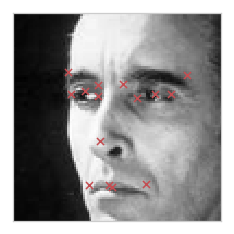

In [44]:
## 모델 예측값과 실제값을 비교해보자

fig = pyplot.figure(figsize=(12, 12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

ax = fig.add_subplot(4, 4, 1, xticks=[], yticks=[])
plot_sample(input_data, predicted, ax)

pyplot.show()

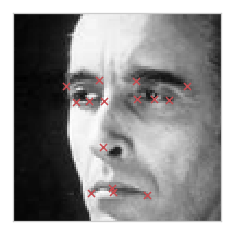

In [45]:
fig = pyplot.figure(figsize=(12, 12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

ax = fig.add_subplot(4, 4, 1, xticks=[], yticks=[])
plot_sample(input_data, y_validation[0], ax)

pyplot.show()

In [46]:
input_data = X_train[4:5,:]
predicted = model.predict(input_data)

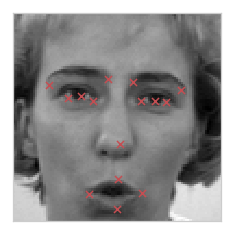

In [47]:
import matplotlib.pyplot as pyplot

fig = pyplot.figure(figsize=(12, 12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

ax = fig.add_subplot(4, 4, 1, xticks=[], yticks=[])
plot_sample(input_data, predicted, ax)

pyplot.show()

#### 5. CNN

이미지 처리는 거의 CNN이라고 봐도 무방할 정도이다.

아래 그림은 이미지를 학습시키는 부분인데 이미지가 여러개가 있는 것처럼 보이지만 한번에 사진 하나씩 들어가는 것이다. 예를 들어서 이미지 픽셀이 96 x 96 라고 하면 input node가 9216개의 노드로 이루어져 있는 것이다.

일반적인 뉴럴네트워크의 특징과 같이 여러 층을 쌓을건데 여러층을 쌓으면 저층의 레이어들은 이미지의 국소적인 특징(여기에 선이있어, 여기에 뾰족한 부분이 있어)을 파악하는 것이고 레이어가 올라갈수록 점점 더 큰 특징(여기에 얼굴이 있어)들을 파악하게 된다. 레이어가 올라갈수록 점점 추상적이고 상위개념의 특징을 잡아낸다고 보면 된다. 그래서 output 단에는 사진을 맞추거나 한다.

<img src="4.png" width="1000" />

아래 그림처럼 MNIST digit 이미지를 예로 들어보자.

먼저 10가지의 서로다른 필터를 적용한다. 한가지의 그림에 10가지의 필터가 씌워졌으니 10개의 채널을 가지게 된다. 그리고나서 max pooling이라는 것을 해서 이미지 사이즈를 압축을 한다. 그래서 28 x 28 이미지가 필터를 거치면서 24 x 24가 되고 max pooling을 해서 12 x 12로 압축을 한다.

그리고 또 convolution layer라고해서 또 필터를 씌운다. 그리고 이번에는 필터개수가 20개인 것이다. 또한 사이즈도 12 x 12 에서 8 x 8로 줄어든다. 또 max pooling해서 4x4가 된다. 이렇게 되면 사이즈가 작고 겹겹히 많이 쌓여있는 형태가 된다. 그래서 drop out 이라는 정규화효과를 레이어를 통과하고 mnist digit image가 0부터 9까지 10가지의 클래스를 판별을 해야하니까 Fully Connected layer라고 해서 거길 통과하면 0 ~ 9의 아웃풋을 뽑아낸다 그리고 softmax를 통과하면 각 클래스별로 확률같은 숫자가 나오게 된다.

<img src="5.png" width="1000" />

- convolution

g라는 함수가 있고 f라는 함수가 있으면 예를 들어서 아래 그림을 든다고 하면 f함수는 가만히 있고, g함수가 계속 움직이게 되는데 g함수가 움직이면서 f함수와 겹치는 넓이를 측정해서 출력하게 된다.

아래 그림에서는 f가 초록색이고 g가 노란색이다.

convolution은 이미지의 필터 같은 효과를 나타내게 된다. 

다시말해서 convolution을 어떻게 설정하느냐에 따라 각각 다른 필터의 효과를 나타낸다는 것이다.

아래 URL을 참고하면 된다.

http://setosa.io/ev/image-kernels

<img src="6.png" width="1000" />

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation=tf.nn.relu, input_shape=(96, 96, 1)),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides=(2,2)),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Conv2D(filters=128, kernel_size=(2,2), padding='same', activation=tf.nn.relu, input_shape=(48, 48, 1)),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides=(2,2)),
  tf.keras.layers.Dropout(0.1),  
  tf.keras.layers.Conv2D(filters=256, kernel_size=(2,2), padding='same', activation=tf.nn.relu, input_shape=(24, 24, 1)),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides=(2,2)),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512),
  tf.keras.layers.Dense(30)
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])